In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

train_dir = 'fer2013/train/'
test_dir = 'fer2013/test/'




train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=False,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                               
                                                )

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


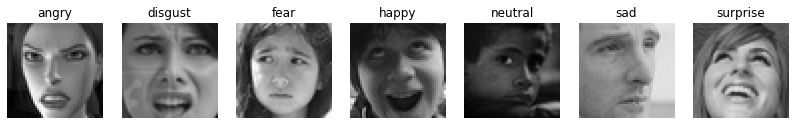

In [8]:
import os
from keras.preprocessing.image import ImageDataGenerator, load_img

plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[5]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [9]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9625030071045374391
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10091102208
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4065649504561682696
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [10]:
model = load_model('EfficientNetB1.h5')
train_loss, train_accu = model.evaluate(training_set)
test_loss, test_accu = model.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 3s 26ms/step - loss: 1.0459 - accuracy: 0.6287 0s - loss: 1.0554 - accuracy: 0.
final train accuracy = 75.39 , validation accuracy = 62.87


Confusion Matrix
[[ 557   10   95   46  101  123   26]
 [  34   58    4    4    4    6    1]
 [ 146    6  436   48  113  193   82]
 [  75    1   47 1463  101   53   34]
 [ 107    1   69   98  761  164   33]
 [ 173    5  134   67  230  618   20]
 [  30    1   85   50   27   18  620]]
Classification Report
              precision    recall  f1-score   support

       angry       0.50      0.58      0.54       958
     disgust       0.71      0.52      0.60       111
        fear       0.50      0.43      0.46      1024
       happy       0.82      0.82      0.82      1774
     neutral       0.57      0.62      0.59      1233
         sad       0.53      0.50      0.51      1247
    surprise       0.76      0.75      0.75       831

    accuracy                           0.63      7178
   macro avg       0.63      0.60      0.61      7178
weighted avg       0.63      0.63      0.63      7178



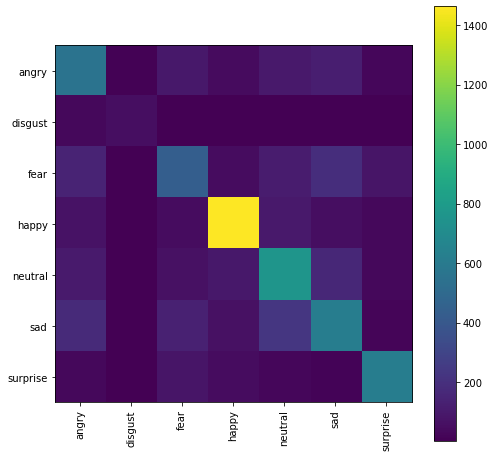

In [17]:
import numpy as np

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

#from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)